In [2]:
import pandas as pd 

df = pd.read_csv("amazon_reviews.csv")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
import nltk
from nltk.corpus import *
from nltk.tokenize import *
from nltk.stem import *
from sklearn.feature_extraction.text import *

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stop words and single character words
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['cleaned_reviews'] = df['verified_reviews'].apply(preprocess_text)

In [6]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 217.9 kB/s eta 0:00:03
   --- ----------------------------------- 51.2/626.3 kB 372.4 kB/s eta 0:00:02
   ----- --------------------------------- 81.9/626.3 kB 508.4 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/626.3 kB 762.6 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/626.3 kB 778.2 kB/s eta 0:00:01
   -------------- ----------------------- 245.8/626.3 kB 793.0 kB/s eta 0:00:01
   ------------------ ------------------- 297.0/626.3 kB 874.1 kB/s eta 0:00:01
   ---------------------- --------------- 368.6/626.3 kB 916.6 kB/s eta 0:00:01
   ------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
def analyze_sentiment(text):
    if pd.isna(text) or text == "":
        return 'Neutral'
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_reviews'].apply(analyze_sentiment)

In [8]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,Negative
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing 4 yr old learns dinosaur control...,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,Neutral


In [9]:
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
sentiment
Positive    2565
Neutral      396
Negative     189
Name: count, dtype: int64


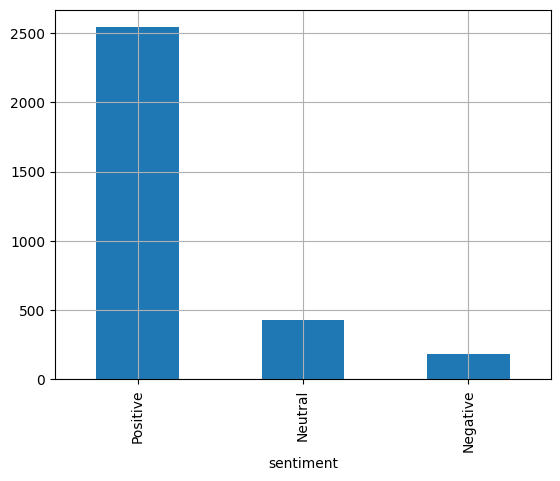

In [25]:
df.sentiment.value_counts().plot.bar().grid()

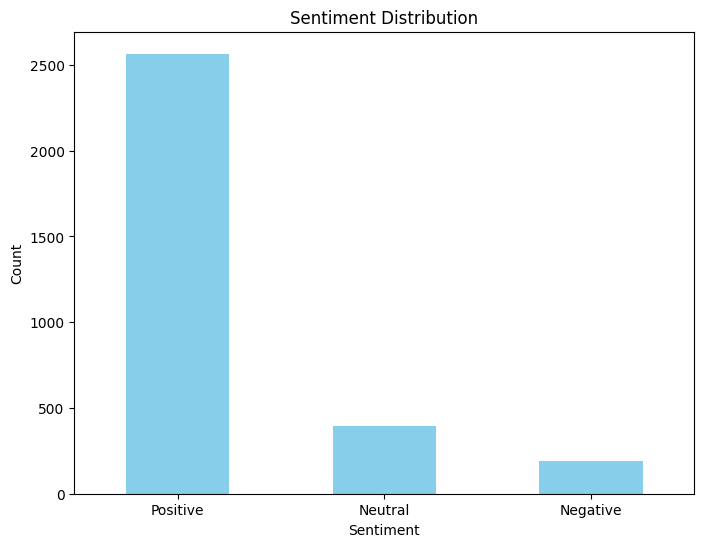

In [10]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

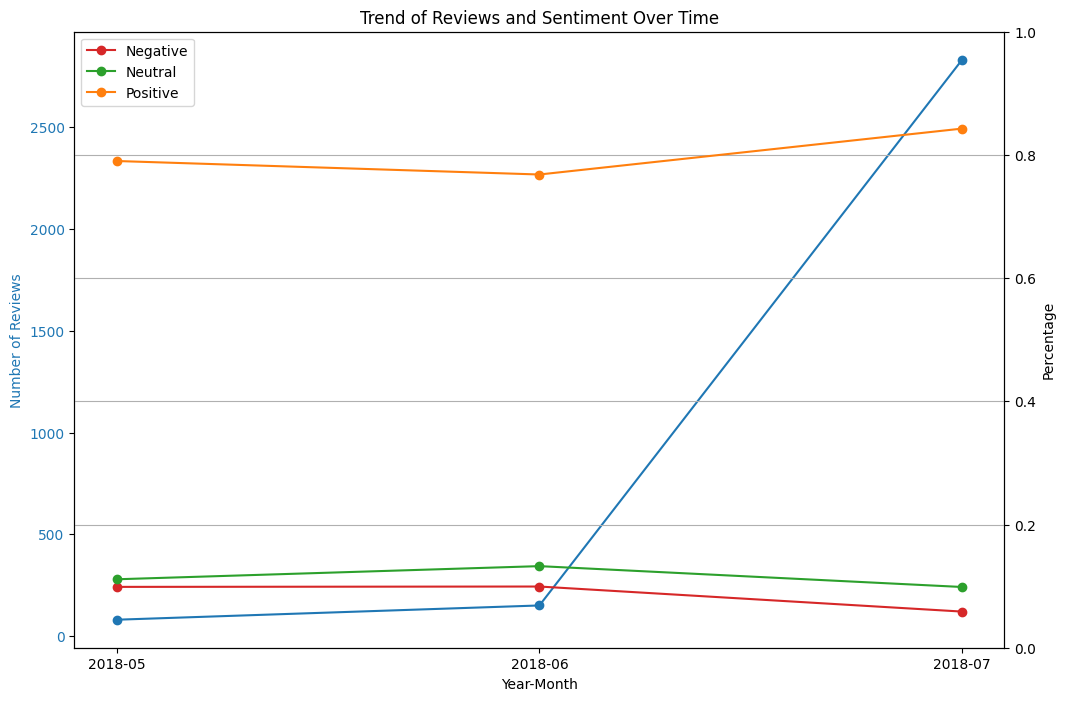

In [24]:
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the 'date' column
df['year_month'] = df['date'].dt.to_period('M')

# Group by year_month and calculate the average sentiment score for each month
monthly_sentiment = df.groupby('year_month')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Calculate the total number of reviews for each month
monthly_reviews = df.groupby('year_month').size()

# Plot the trend of reviews and sentiment over time
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the trend of total number of reviews
color = 'tab:blue'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Number of Reviews', color=color)
ax1.plot(monthly_reviews.index.astype(str), monthly_reviews.values, color=color, marker='o', label='Number of Reviews')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for sentiment
ax2 = ax1.twinx()

# Plot the sentiment scores
colors = ['tab:red', 'tab:green', 'tab:orange']
for i, sentiment in enumerate(monthly_sentiment.columns):
    ax2.plot(monthly_sentiment.index.astype(str), monthly_sentiment[sentiment], color=colors[i], marker='o', label=sentiment)

ax2.set_ylabel('Percentage', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 1)

plt.title('Trend of Reviews and Sentiment Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()